In [1]:
# Pacotes de trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Importação dos dados
df = pd.read_csv("dados_clientes.csv", encoding='UTF-8', delimiter=";")

In [3]:
# Visualizando uma amostra dos dados
df.head()

,client_id,registration_date,Life_time,scoring_program,annual_contract
0,CL2016958,2016-05-23,2048,250,1395948
1,CL2012567,2012-11-30,3318,338,1205038
2,CL2016968,2016-07-06,2004,202,1120356
3,CL20171117,2017-11-09,1513,144,1001386
4,CL2016976,2016-08-25,1954,142,784636


In [4]:
# Visualizando a quantidade linhas e colunas
df.shape

(1000, 5)

In [5]:
# Verificando a tipagem dos dados
df.dtypes 

client_id            object
registration_date    object
Life_time             int64
scoring_program       int64
annual_contract       int64
dtype: object

In [6]:
# Descrevendo as variáveis númericas
df.describe()

,Life_time,scoring_program,annual_contract
count,1000.00,1000.00,1000.00
mean,2306.92,49.56,82310.15
std,1457.40,57.68,109947.53
min,9.00,2.00,37471.00
25%,995.25,13.00,39687.75
50%,2259.50,28.00,48044.00
75%,3531.00,57.25,74148.50
max,5401.00,338.00,1395948.00


In [7]:
# Verificando a existência de valores ausentes
df.isna().sum()

client_id            0
registration_date    0
Life_time            0
scoring_program      0
annual_contract      0
dtype: int64

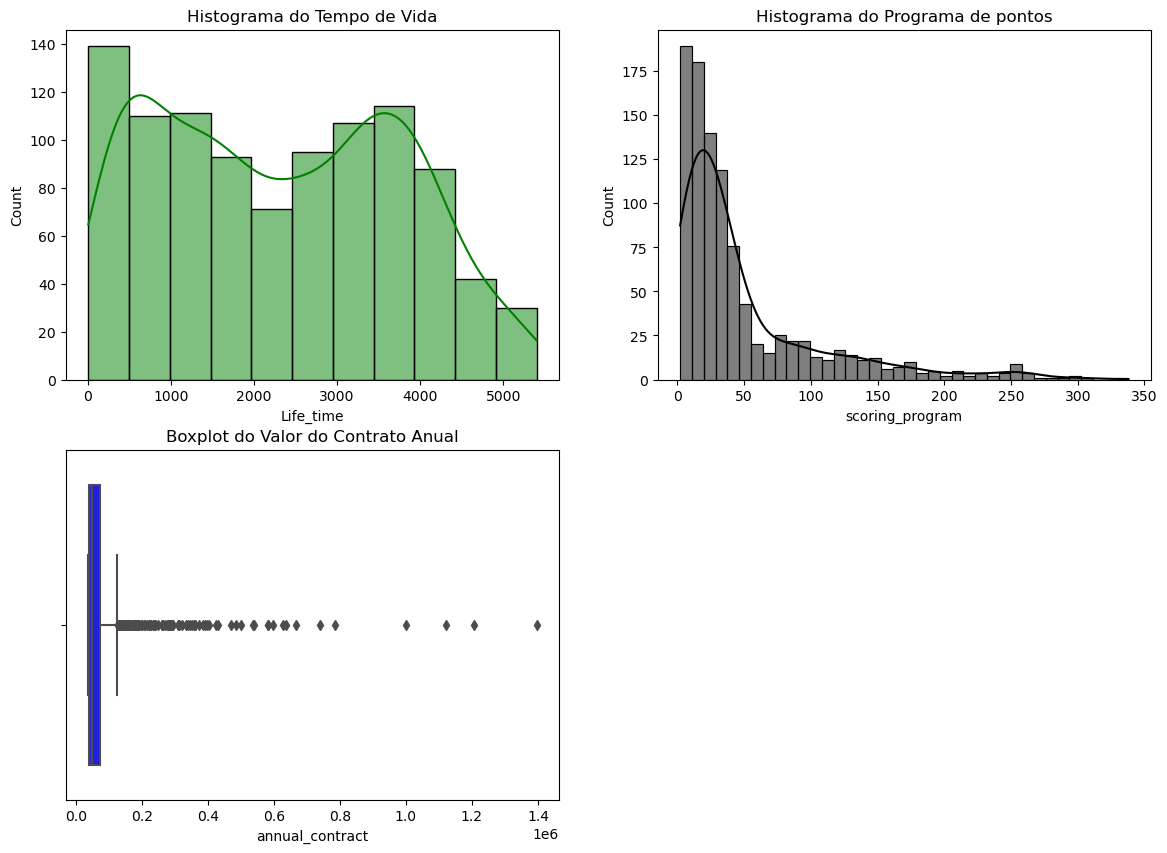

In [8]:
# Criando gráficos para avaliar a distribuição dos dados

plt.figure(figsize = (14,10))

plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['Life_time'], kde = True, color = "green")
plt.title('Histograma do Tempo de Vida', fontsize = 12)

plt.subplot(222)
sns.histplot(df['scoring_program'], kde = True, color = "black")
plt.title('Histograma do Programa de pontos', fontsize = 12)

plt.subplot(223)
sns.boxplot(df['annual_contract'], color = "blue")
plt.title('Boxplot do Valor do Contrato Anual', fontsize = 12)

plt.show()

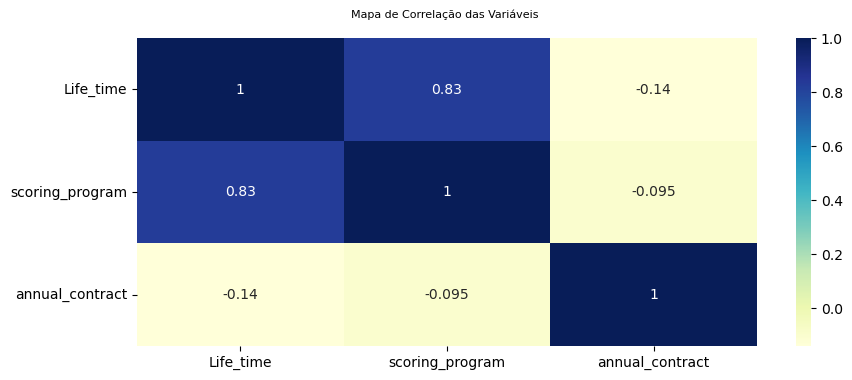

In [9]:
# Heatmap para analisar a correlação entre as variáveis
plt.figure(figsize = (10,4))
sns.heatmap(df.drop(["client_id","registration_date"], axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis \n", fontsize = 8)
plt.show()

In [10]:
# Criando um novo dataframe somente com as variáveis númericas
df_ajustado = df.drop(["client_id","registration_date"], axis = 1)

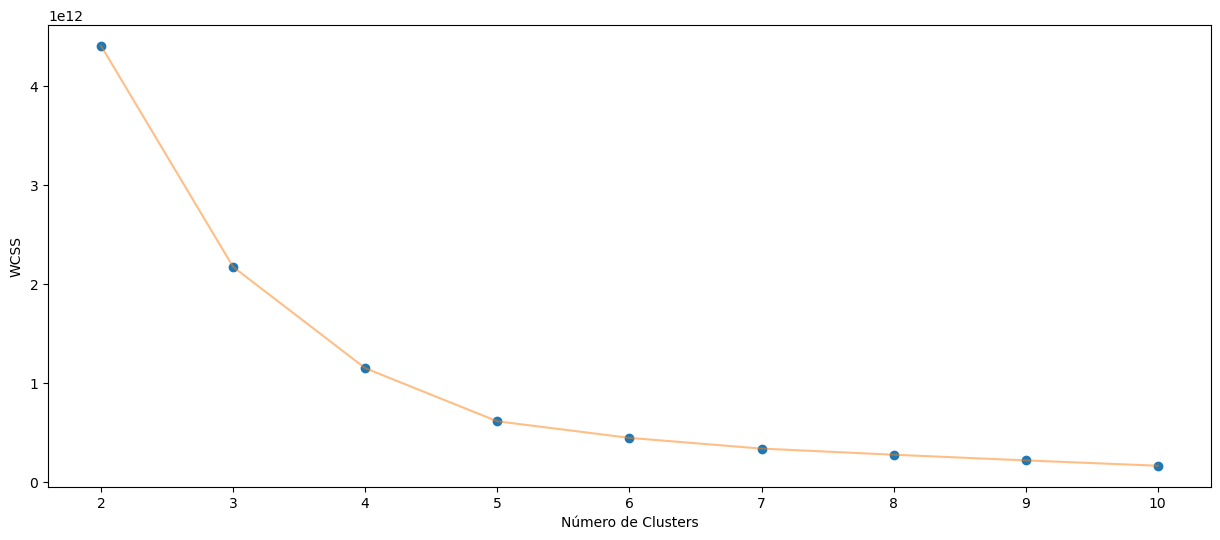

In [11]:
# Loop para testar os valores de K
wcss_X1 = []
for n in range(2, 11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(df_ajustado)
    wcss_X1.append(modelo.inertia_)
# Gráfico com resultado
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

### Criando Primeira Versão do Modelo

In [12]:
# Cópia dos dados
df1 = df.drop(["client_id","registration_date"], axis = 1)

In [13]:
# Criando a primeira versão do modelo com 3 clusters
k = 3
kmeansv1 = KMeans(n_clusters = k)
kmeansv1.fit(df1) 

KMeans(n_clusters=3)

In [14]:
# Fazendo a junção dos dados com os labels gerado pelo agrupador
df_final = df.copy()
df_final['Group'] = kmeansv1.labels_
df1['Group'] = kmeansv1.labels_

In [15]:
# Visualizando o relatório dos Clientes por grupo
df_final.sample(10)

,client_id,registration_date,Life_time,scoring_program,annual_contract,Group
118,CL20211590,2021-01-13,352,10,129179,0
696,CL2014787,2014-11-11,2607,88,40343,0
748,CL20201413,2020-02-27,673,26,39705,0
486,CL2013578,2013-01-04,3283,31,48924,0
198,CL20211659,2021-05-20,225,6,87833,0
284,CL2016962,2016-06-13,2027,24,68346,0
698,CL2015813,2015-01-30,2527,83,40315,0
695,CL2012469,2012-05-15,3517,25,40347,0
287,CL2016972,2016-08-02,1977,23,67863,0
128,CL20181190,2018-06-28,1282,24,122145,0


In [16]:
# Reduzindo a dimensionalidade com PCA para conseguirmos realizar a plotagem 
pca = PCA(n_components = 2).fit(df1)
pca_2d = pca.transform(df1)

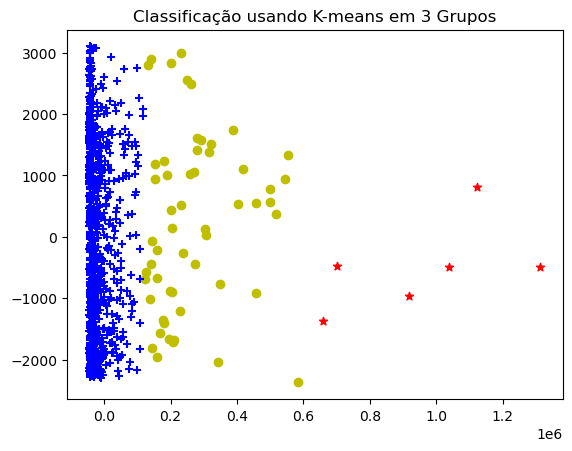

In [17]:
for i in range(0, pca_2d.shape[0]):
    
    if kmeansv1.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='b', marker = '+')    
    elif kmeansv1.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='y', marker = 'o')
    elif kmeansv1.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1], c ='r', marker = '*')        
        #pl.legend([c1, c2, c3],['Grupo 0', 'Grupo 1', 'Grupo 2'])
        pl.title("Classificação usando K-means em " f'{k}'" Grupos")
plt.show()

<Figure size 1000x600 with 0 Axes>

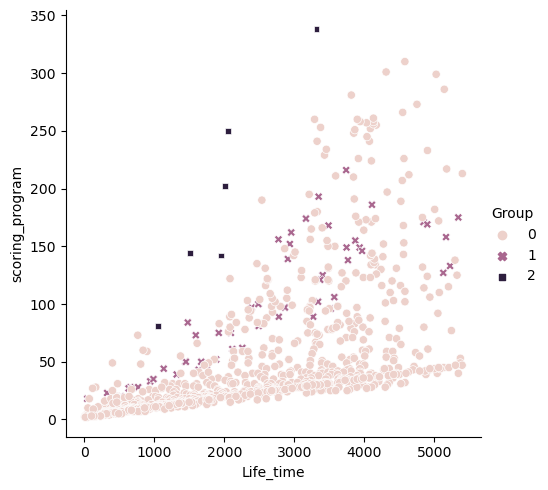

In [18]:
# Gráfico de relação entre as variáveis tempo de vida e programa de pontos
plt.figure(figsize = (10,6))
sns.relplot(x = "Life_time", y = "scoring_program", hue = "Group", style = "Group", data = df_final)
plt.show()

In [19]:
# Greando Relatório com a média por grupo (Life_time, scoring_program)
df_media = df_final.groupby(["Group"]).mean()[["Life_time", "scoring_program"]]
df_media

,Life_time,scoring_program
Group,,
0,2292.33,45.82
1,2591.36,97.82
2,1982.50,192.83


In [20]:
# Greando Relatório com agrupamento da soma da variável annual_contract
df_soma = df_final.groupby(["Group"]).sum()['annual_contract'].reset_index()
df_soma['% annual_contract'] = df_soma['annual_contract'] / df_soma['annual_contract'].sum() * 100
df_soma.set_index(keys='Group')

,annual_contract,% annual_contract
Group,,
0,56811407,69.02
1,19250973,23.39
2,6247770,7.59


### Criando Segunda Versão do Modelo

In [21]:
df2 = df.drop(["client_id","registration_date"], axis = 1)

In [22]:
def replace_outliers(df, columns): 
    for col in columns: 
        Q1, Q3 = df[col].quantile(0.25),df[col].quantile(0.75)
        IQR = Q3 - Q1
        cut_off = IQR
        lower, upper = Q1 - cut_off, Q3 + cut_off
        df[col] = np.where(df[col] > upper, upper, df[col]) 
        df[col] = np.where(df[col] < lower, lower, df[col])
    return df

In [23]:
df2 = replace_outliers(df2,list(df2.columns))

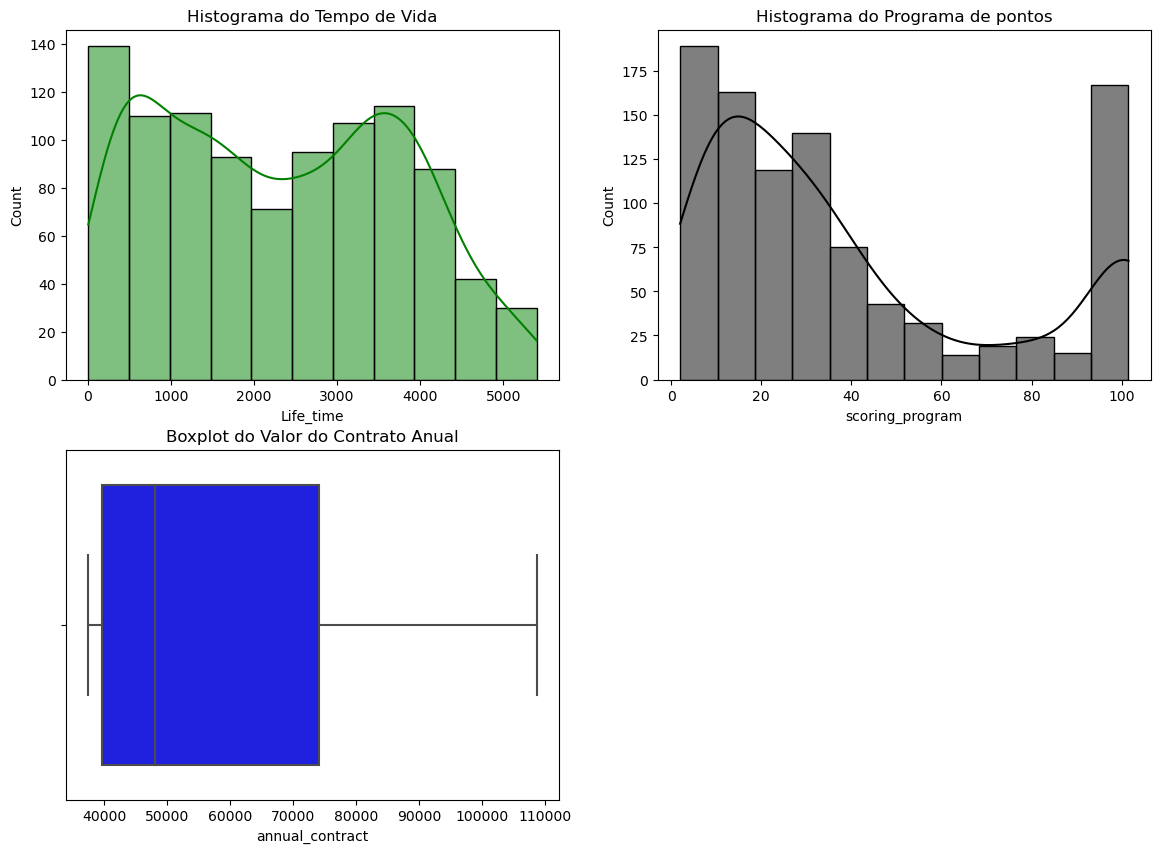

In [24]:
# Criando gráficos para avaliar a distribuição dos dados

plt.figure(figsize = (14,10))

plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df2['Life_time'], kde = True, color = "green")
plt.title('Histograma do Tempo de Vida', fontsize = 12)

plt.subplot(222)
sns.histplot(df2['scoring_program'], kde = True, color = "black")
plt.title('Histograma do Programa de pontos', fontsize = 12)

plt.subplot(223)
sns.boxplot(df2['annual_contract'], color = "blue")
plt.title('Boxplot do Valor do Contrato Anual', fontsize = 12)

plt.show()

In [25]:
# Criando a primeira versão do modelo com 3 clusters
k2 = 3
kmeansv2 = KMeans(n_clusters = k2)
kmeansv2.fit(df2) 

KMeans(n_clusters=3)

In [26]:
# Fazendo a junção dos dados com os labels gerado pelo agrupador
df_final2 = df
df_final2['Group'] = kmeansv2.labels_

In [ ]:
# Visualizando o relatório dos Clientes por grupo
df_final2.sample(10)

In [27]:
# Reduzindo a dimensionalidade para conseguirmos realizar a plotagem
df2['Group'] = kmeansv2.labels_
pca2 = PCA(n_components = 2).fit(df2)
# Aplicando o PCA
pca_2d2 = pca.transform(df2)

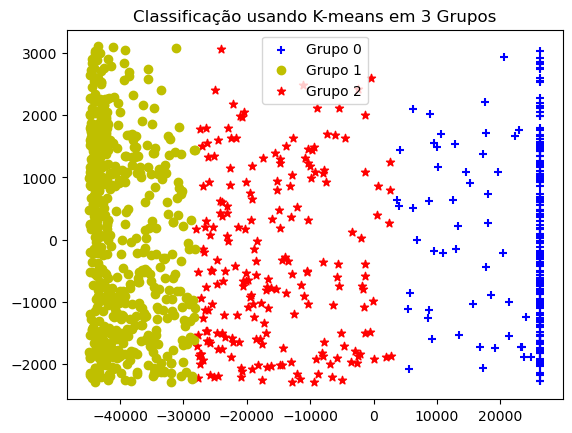

In [28]:
for i in range(0, pca_2d2.shape[0]):
    
    if kmeansv2.labels_[i] == 0:
        c1 = pl.scatter(pca_2d2[i,0],pca_2d2[i,1], c ='b', marker = '+')    
    elif kmeansv2.labels_[i] == 1:
        c2 = pl.scatter(pca_2d2[i,0],pca_2d2[i,1], c ='y', marker = 'o')
    elif kmeansv2.labels_[i] == 2:
        c3 = pl.scatter(pca_2d2[i,0],pca_2d2[i,1], c ='r', marker = '*')
        pl.legend([c1, c2, c3],['Grupo 0', 'Grupo 1', 'Grupo 2'])
        pl.title("Classificação usando K-means em " f'{k2}'" Grupos")        
plt.show()

<Figure size 1000x600 with 0 Axes>

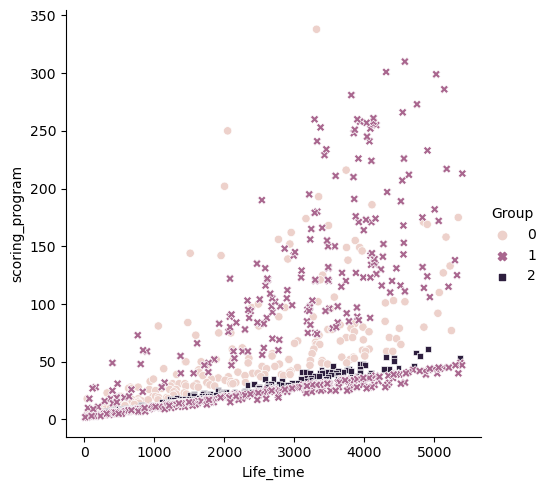

In [29]:
# Gráfico de relação entre as variáveis tempo de vida e programa de pontos
plt.figure(figsize = (10,6))
sns.relplot(x = "Life_time", y = "scoring_program", hue = "Group", style = "Group", data = df_final2)
plt.show()

In [30]:
# Greando Relatório com a média por grupo (Life_time, scoring_program)
df_media2 = df_final2.groupby(["Group"]).mean()[["Life_time", "scoring_program"]]
df_media2

,Life_time,scoring_program
Group,,
0,2366.70,61.26
1,2416.02,55.27
2,1948.63,22.61


In [31]:
# Greando Relatório com agrupamento da soma da variável annual_contract
df_soma2 = df_final2.groupby(["Group"]).sum()['annual_contract'].reset_index()
df_soma2['% annual_contract'] = df_soma2['annual_contract'] / df_soma2['annual_contract'].sum() * 100
df_soma2.set_index(keys='Group')

,annual_contract,% annual_contract
Group,,
0,43561525,52.92
1,24696984,30.00
2,14051641,17.07


### Criando Terceira Versão do Modelo

In [32]:
df3 = df.drop(["client_id","registration_date","Group"], axis = 1)
df3.head()

,Life_time,scoring_program,annual_contract
0,2048,250,1395948
1,3318,338,1205038
2,2004,202,1120356
3,1513,144,1001386
4,1954,142,784636


In [33]:
# Criando a terceira versão do modelo com 4 clusters
k3 = 4
kmeansv3 = KMeans(n_clusters = k3)
kmeansv3.fit(df3) 

KMeans(n_clusters=4)

In [34]:
# Fazendo a junção dos dados com os labels gerado pelo agrupador
df_final3 = df3.copy()
df_final3['Group'] = kmeansv3.labels_
df_final3.sample(10)

,Life_time,scoring_program,annual_contract,Group
0,2048,250,1395948,2
1,3318,338,1205038,2
2,2004,202,1120356,2
3,1513,144,1001386,2
4,1954,142,784636,1
...,...,...,...,...
995,402,49,37492,0
996,3182,29,37488,0
997,492,5,37481,0
998,3290,260,37473,0


In [35]:
# Reduzindo a dimensionalidade para conseguirmos realizar a plotagem
df3['Group'] = kmeansv3.labels_
pca3 = PCA(n_components = 2).fit(df3)
# Aplicando o PCA
pca_2d3 = pca.transform(df3)

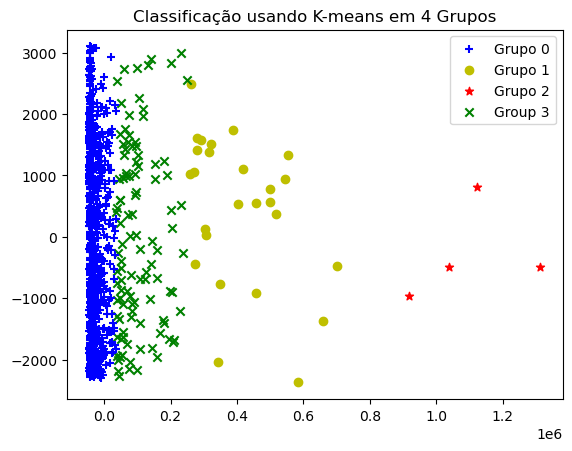

In [36]:
for i in range(0, pca_2d3.shape[0]):
    
    if kmeansv3.labels_[i] == 0:
        c1 = pl.scatter(pca_2d3[i,0],pca_2d3[i,1], c ='b', marker = '+')    
    elif kmeansv3.labels_[i] == 1:
        c2 = pl.scatter(pca_2d3[i,0],pca_2d3[i,1], c ='y', marker = 'o')
    elif kmeansv3.labels_[i] == 2:
        c3 = pl.scatter(pca_2d3[i,0],pca_2d3[i,1], c ='r', marker = '*')
    elif kmeansv3.labels_[i] == 3:
        c4 = pl.scatter(pca_2d3[i,0],pca_2d3[i,1], c ='g', marker = 'x')   
        pl.legend([c1, c2, c3, c4],['Grupo 0', 'Grupo 1', 'Grupo 2', 'Group 3'])
        pl.title("Classificação usando K-means em " f'{k3}'" Grupos")        
plt.show()

<Figure size 1000x600 with 0 Axes>

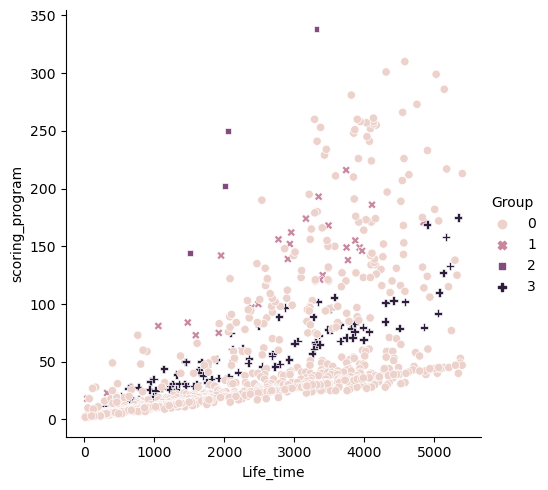

In [37]:
# Gráfico de relação entre as variáveis tempo de vida e programa de pontos
plt.figure(figsize = (10,6))
sns.relplot(x = "Life_time", y = "scoring_program", hue = "Group", style = "Group", data = df_final3)

In [38]:
# Greando Relatório com a média por grupo (Life_time, scoring_program)
df_media3 = df_final3.groupby(["Group"]).mean()[["Life_time", "scoring_program"]]
df_media3

,Life_time,scoring_program
Group,,
0,2289.95,45.66
1,2830.46,130.50
2,2220.75,233.50
3,2319.79,54.48


In [39]:
# Greando Relatório com agrupamento da soma da variável annual_contract
df_soma3 = df_final3.groupby(["Group"]).sum()['annual_contract'].reset_index()
df_soma3['% annual_contract'] = df_soma3['annual_contract'] / df_soma3['annual_contract'].sum() * 100
df_soma3.set_index(keys='Group')

,annual_contract,% annual_contract
Group,,
0,45379058,55.13
1,12670605,15.39
2,4722728,5.74
3,19537759,23.74


### Criando Quarta Versão do Modelo

In [40]:
df4 = df.drop(["client_id","registration_date","Group"], axis = 1)
df4 = replace_outliers(df4,list(df4.columns))

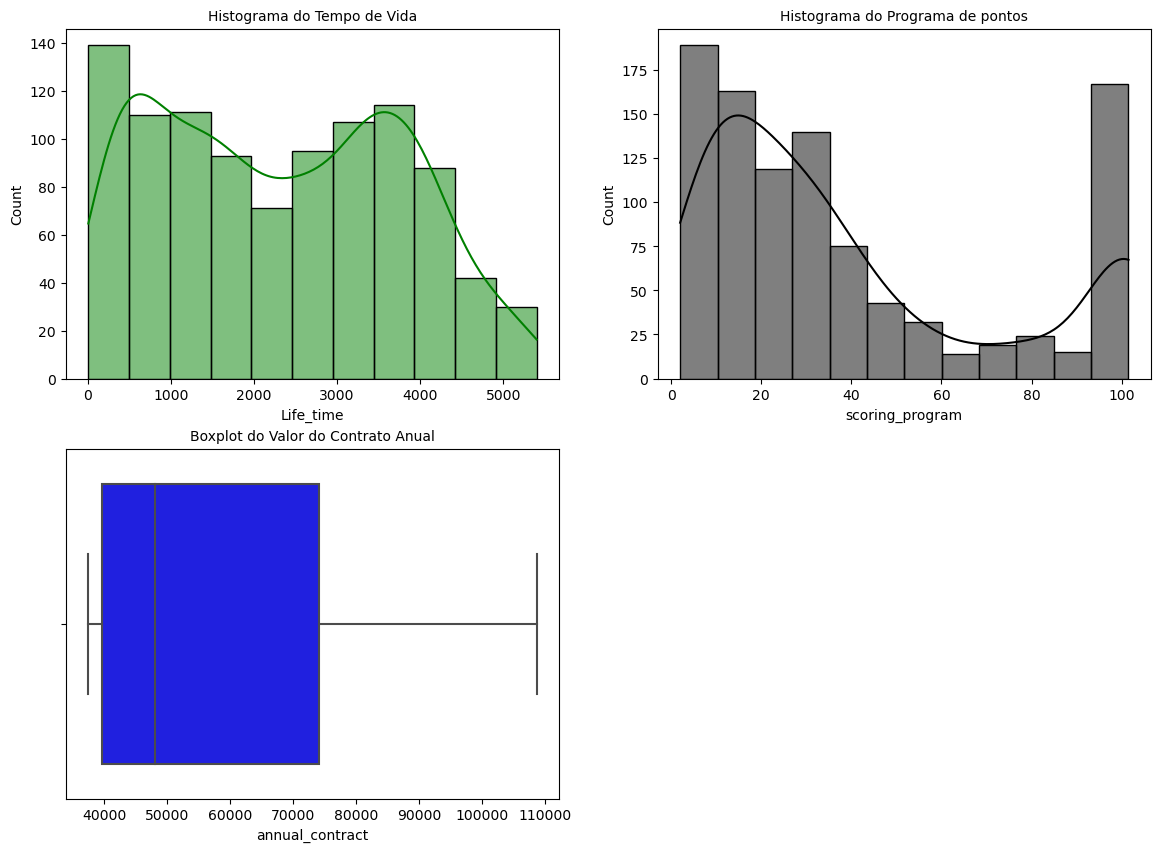

In [41]:
# Criando gráficos para avaliar a distribuição dos dados

plt.figure(figsize = (14,10))

plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df4['Life_time'], kde = True, color = "green")
plt.title('Histograma do Tempo de Vida', fontsize = 10)

plt.subplot(222)
sns.histplot(df4['scoring_program'], kde = True, color = "black")
plt.title('Histograma do Programa de pontos', fontsize = 10)

plt.subplot(223)
sns.boxplot(df4['annual_contract'], color = "blue")
plt.title('Boxplot do Valor do Contrato Anual', fontsize = 10)

plt.show()

In [42]:
# Criando a primeira versão do modelo com 3 clusters
k4 = 4
kmeansv4 = KMeans(n_clusters = k4)
kmeansv4.fit(df4)

KMeans(n_clusters=4)

In [43]:
# Fazendo a junção dos dados com os labels gerado pelo agrupador
df_final4 = df4.copy()
df_final4['Group'] = kmeansv4.labels_
df_final4.sample(10)

,Life_time,scoring_program,annual_contract,Group
0,2048.00,101.50,108609.25,1
1,3318.00,101.50,108609.25,1
2,2004.00,101.50,108609.25,1
3,1513.00,101.50,108609.25,1
4,1954.00,101.50,108609.25,1
...,...,...,...,...
995,402.00,49.00,37492.00,2
996,3182.00,29.00,37488.00,2
997,492.00,5.00,37481.00,2
998,3290.00,101.50,37473.00,2


In [44]:
# Reduzindo a dimensionalidade para conseguirmos realizar a plotagem
df4['Group'] = kmeansv4.labels_
pca4 = PCA(n_components = 2).fit(df4)
# Aplicando o PCA
pca_2d4 = pca.transform(df4)

In [45]:
# Fazendo a junção dos dados com os labels gerado pelo agrupador
df_final4 = df
df_final4['Group'] = kmeansv4.labels_

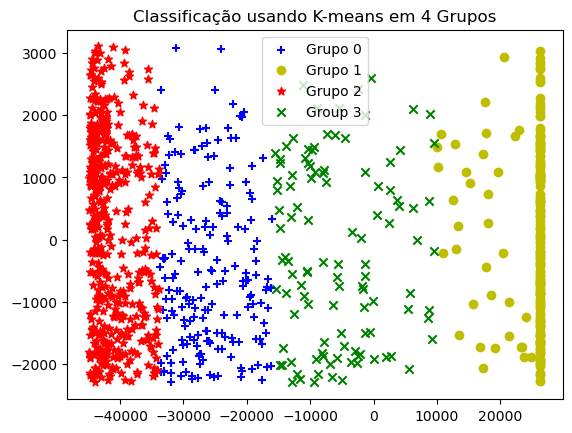

In [46]:
for i in range(0, pca_2d4.shape[0]):
    
    if kmeansv4.labels_[i] == 0:
        c1 = pl.scatter(pca_2d4[i,0],pca_2d4[i,1], c ='b', marker = '+')    
    elif kmeansv4.labels_[i] == 1:
        c2 = pl.scatter(pca_2d4[i,0],pca_2d4[i,1], c ='y', marker = 'o')
    elif kmeansv4.labels_[i] == 2:
        c3 = pl.scatter(pca_2d4[i,0],pca_2d4[i,1], c ='r', marker = '*')
    elif kmeansv4.labels_[i] == 3:
        c4 = pl.scatter(pca_2d4[i,0],pca_2d4[i,1], c ='g', marker = 'x')   
        pl.legend([c1, c2, c3, c4],['Grupo 0', 'Grupo 1', 'Grupo 2', 'Group 3'])
        pl.title("Classificação usando K-means em " f'{k4}'" Grupos")        
plt.show()

<Figure size 1000x600 with 0 Axes>

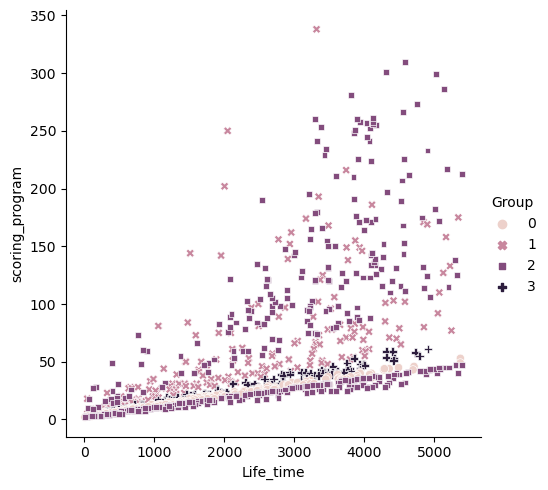

In [47]:
# Gráfico de relação entre as variáveis tempo de vida e programa de pontos
plt.figure(figsize = (10,6))
sns.relplot(x = "Life_time", y = "scoring_program", hue = "Group", style = "Group", data = df_final4)
plt.show()

In [48]:
# Greando Relatório com a média por grupo (Life_time, scoring_program)
df_media4 = df_final4.groupby(["Group"]).mean()[["Life_time", "scoring_program"]]
df_media4

,Life_time,scoring_program
Group,,
0,1840.16,19.21
1,2365.34,63.64
2,2504.73,60.84
3,2115.47,26.96


In [49]:
# Greando Relatório com agrupamento da soma da variável annual_contract
df_soma4 = df_final4.groupby(["Group"]).sum()['annual_contract'].reset_index()
df_soma4['% annual_contract'] = df_soma4['annual_contract'] / df_soma4['annual_contract'].sum() * 100
df_soma4.set_index(keys='Group')

,annual_contract,% annual_contract
Group,,
0,10933294,13.28
1,42133532,51.19
2,20798814,25.27
3,8444510,10.26
